In [21]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
import numpy as np

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-03-25 19:26:39,323: Default instance: ibm-q-education/uni-florence-1/quantum-machine


In [2]:
from qiskit.circuit import Parameter
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.synthesis import SuzukiTrotter, MatrixExponential
from qiskit.quantum_info import Operator, SparsePauliOp

In [12]:
nqubits = 12 # Number of qubits
from qiskit import  QuantumRegister, ClassicalRegister
qr = QuantumRegister(nqubits, 'q')
cr = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qr, cr)

In [13]:
phi = np.pi #np.linspace(-np.pi, np.pi, 201)

In [14]:
def cirquit(quant_circuit, nqubits, phi):
    for qubit in range(nqubits):
       quant_circuit.ry(np.pi/2,qubit)
       #quant_circuit.barrier()
       # Encoder, n_en = 0
       quant_circuit.ry(np.pi/2,qubit)
       #quant_circuit.barrier()
       #  Evolution of the phase in the atomic state
       quant_circuit.rz(phi,qubit)  
       #quant_circuit.barrier()
       # Decoder, n_dec = 0
       quant_circuit.rx(np.pi/2,qubit) 
       #quant_circuit.barrier()
       # Measurement 
       quant_circuit.measure(qubit, cr)# Measuring qubit 
    return quant_circuit

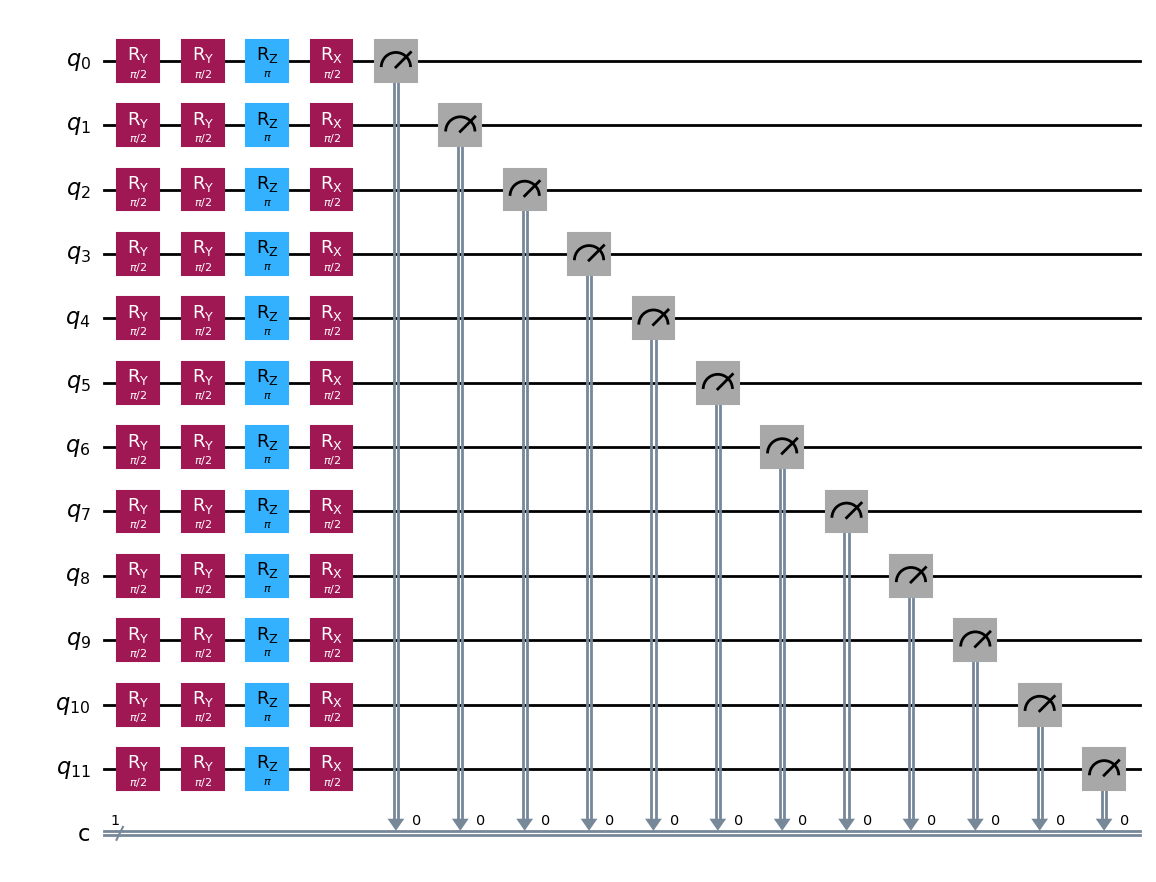

In [15]:
qc = cirquit(qc, nqubits, phi) 
qc.draw('mpl')

In [22]:
from qiskit.visualization import plot_histogram

# Simulate the circuit
simulator =  AerSimulator() #Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=500)
result = job.result()

# Get counts from the result
counts = result.get_counts(qc)

# Plot the histogram
plot_histogram(counts)

Traceback (most recent call last):
  Cell In[22], line 5
    job = execute(qc, simulator, shots=500)
NameError: name 'execute' is not defined

Use %tb to get the full traceback.
